# Visualization with Matplotlib and Seaborn : 

### Importing Required Libraries

In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('customers_dataset.csv')

In [33]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [35]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [36]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [37]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Renaming columns

In [38]:
df.columns = [col.title().replace(' ','_') for col in df.columns]

# new cols names
for col in df.columns:
    print(col)

Customerid
Gender
Age
Annual_Income_(K$)
Spending_Score_(1-100)


### Histplot

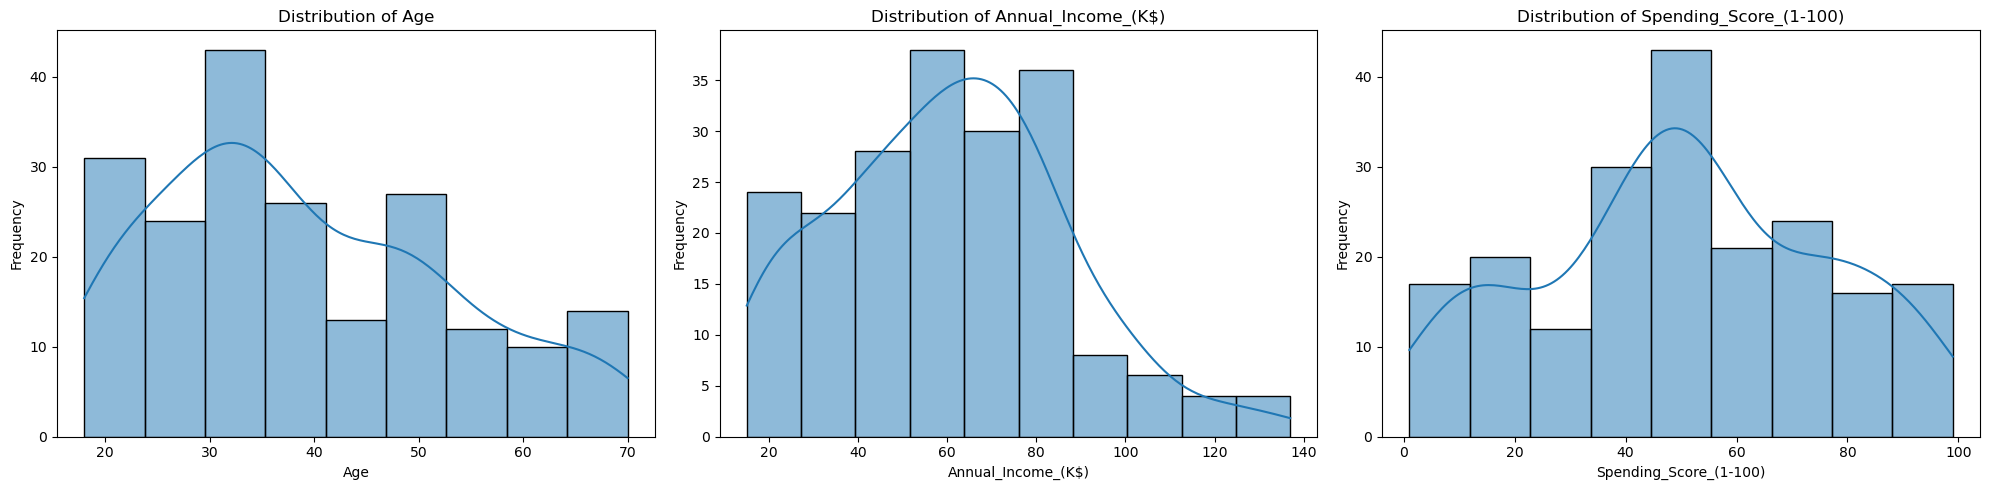

In [39]:
numeric_cols = ['Age', 'Annual_Income_(K$)', 'Spending_Score_(1-100)']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, ax=axes[i], kde=True, x=col)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The Distribution of Age and Annual_Income_(K$) are left - skewed and the distribution of Spending Score is almost nomalized. 


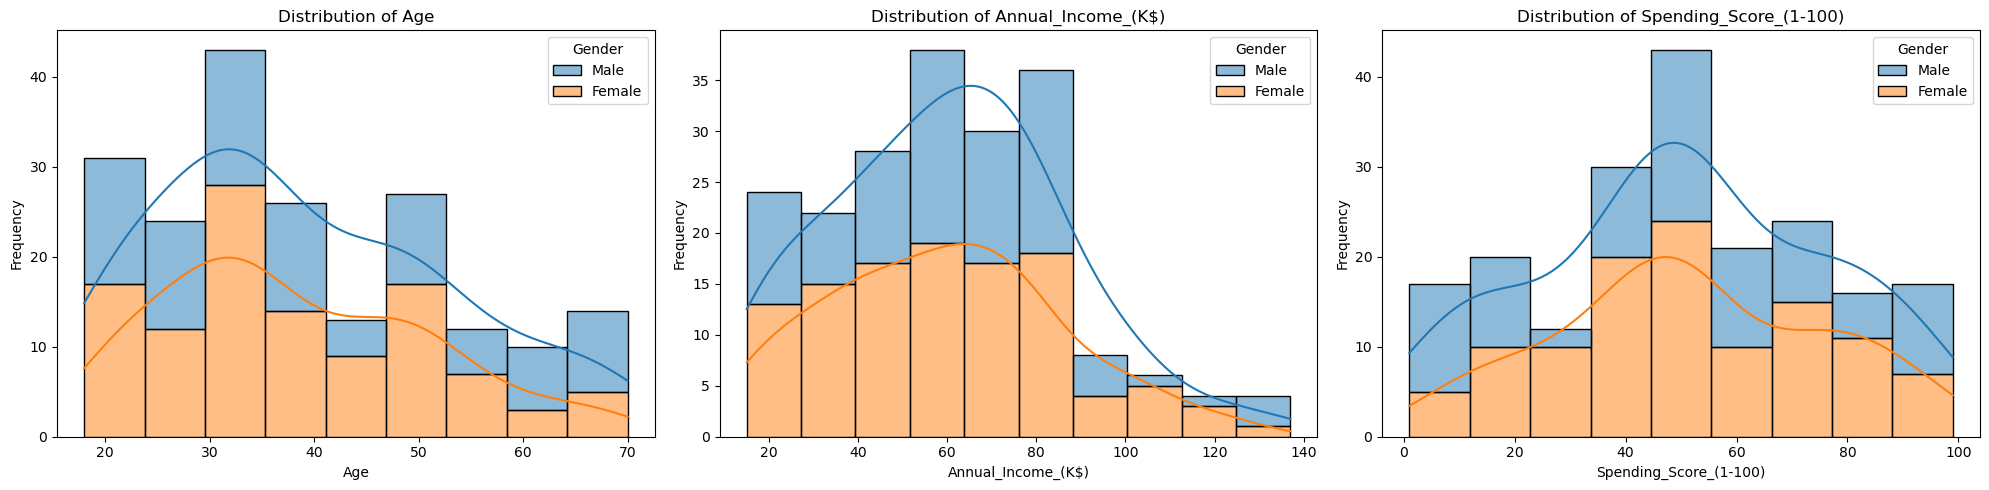

In [40]:
numeric_cols = ['Age', 'Annual_Income_(K$)', 'Spending_Score_(1-100)']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, ax=axes[i], kde=True, x=col, hue = 'Gender', multiple = 'stack')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Males have a higher frequency in each feature than females

### BOXPLOT

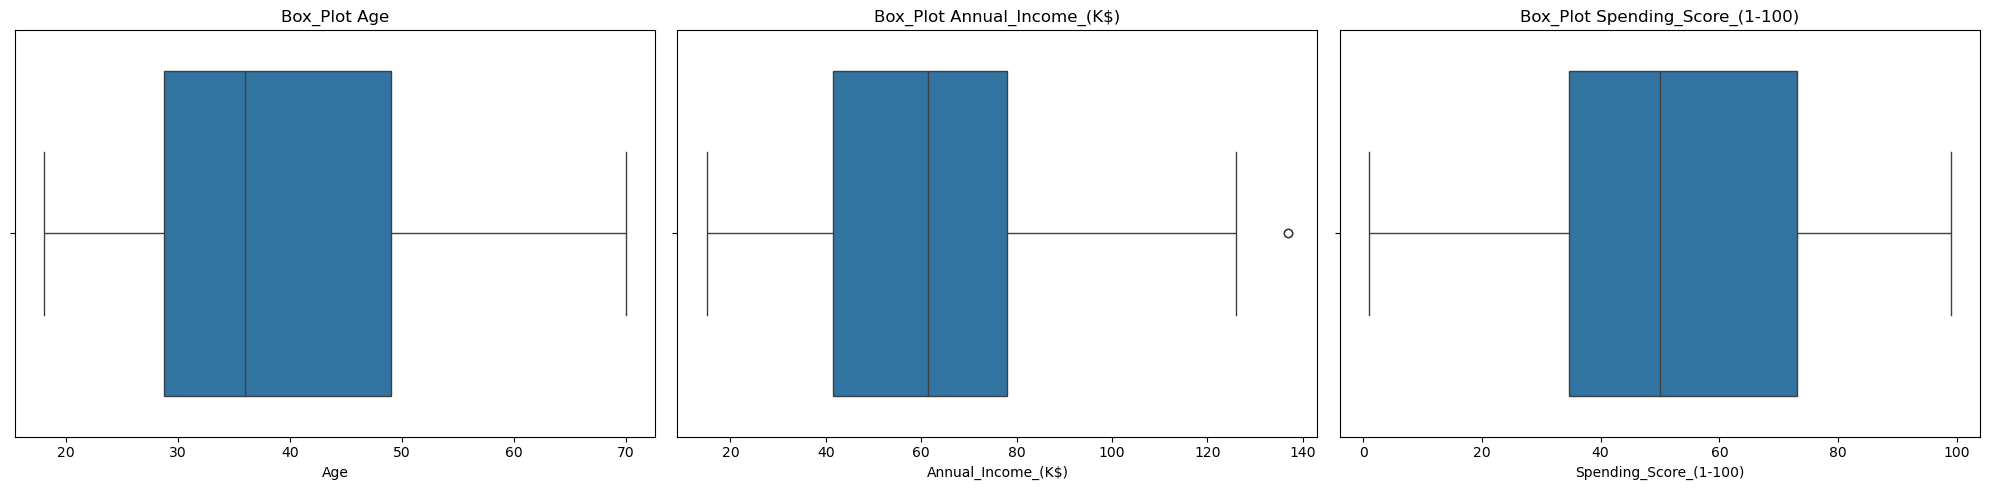

In [41]:
numeric_cols = ['Age', 'Annual_Income_(K$)', 'Spending_Score_(1-100)']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, ax=axes[i], x=col)
    axes[i].set_title(f'Box_Plot {col}')
    axes[i].set_xlabel(col)
    

plt.tight_layout()
plt.show()

There is an outlier in Annual_Income_(K$)

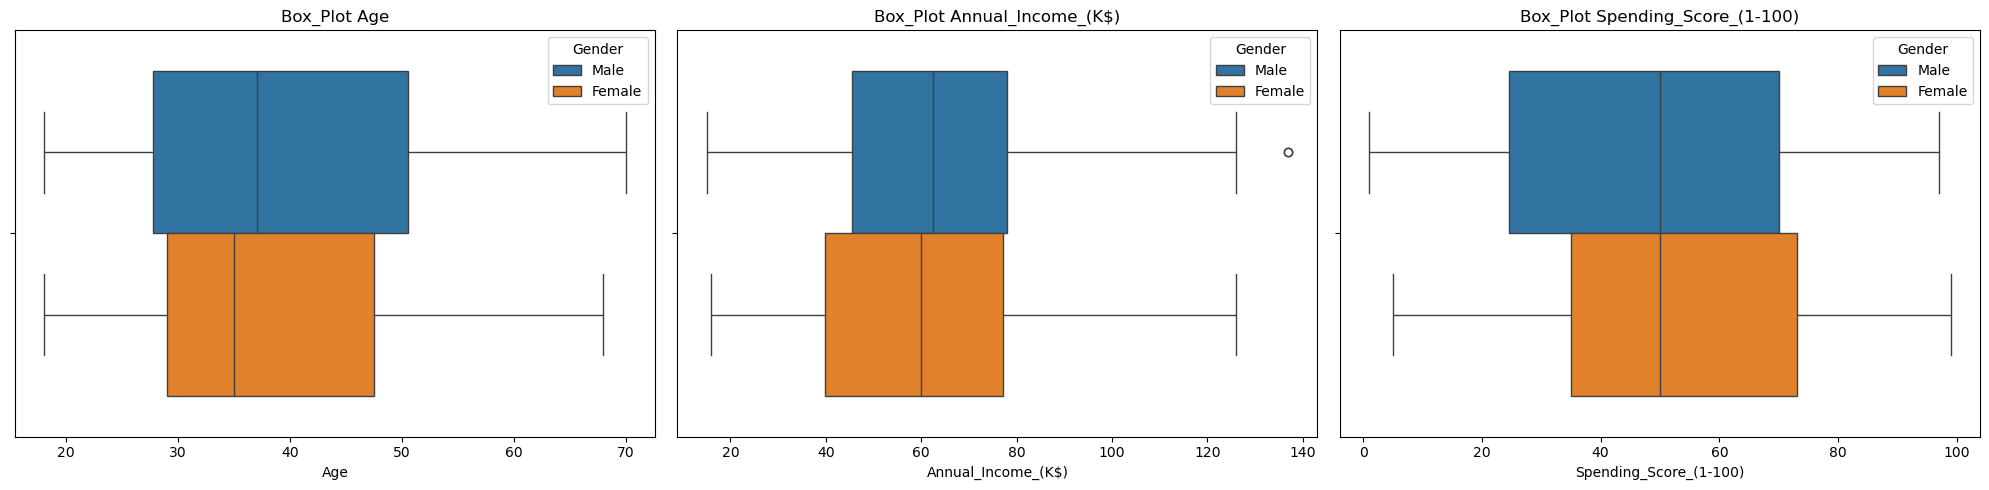

In [42]:
numeric_cols = ['Age', 'Annual_Income_(K$)', 'Spending_Score_(1-100)']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, ax=axes[i], x=col, hue = 'Gender')
    axes[i].set_title(f'Box_Plot {col}')
    axes[i].set_xlabel(col)
    

plt.tight_layout()
plt.show()

In [43]:
print(df['Gender'].value_counts())

Gender
Female    112
Male       88
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

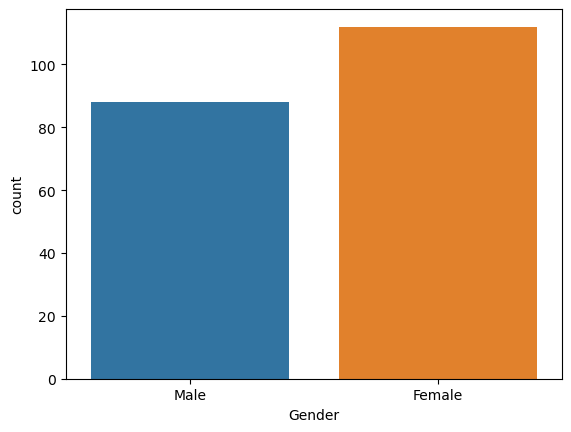

In [44]:
sns.countplot(x='Gender', data = df, hue = 'Gender')

### Correlation Matrix

In [45]:
corr = df[numeric_cols].corr()

corr

,Age,Annual_Income_(K$),Spending_Score_(1-100)
Age,1.000000,-0.012398,-0.327227
Annual_Income_(K$),-0.012398,1.000000,0.009903
Spending_Score_(1-100),-0.327227,0.009903,1.000000


<Axes: >

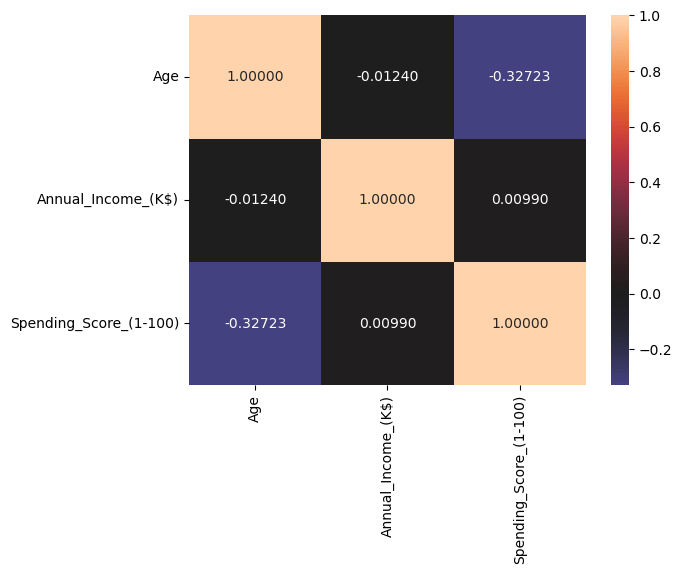

In [46]:
sns.heatmap(corr, vmax=1, center = 0, fmt = '.5f', annot = True)

Spending_Score and Age has the highest coorelation 

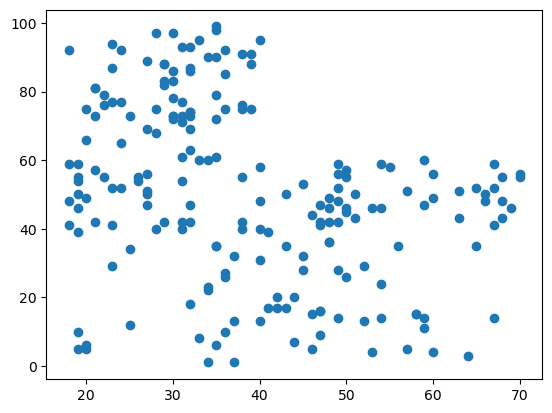

In [47]:
plt.scatter(df['Age'], df['Spending_Score_(1-100)'])
plt.show()

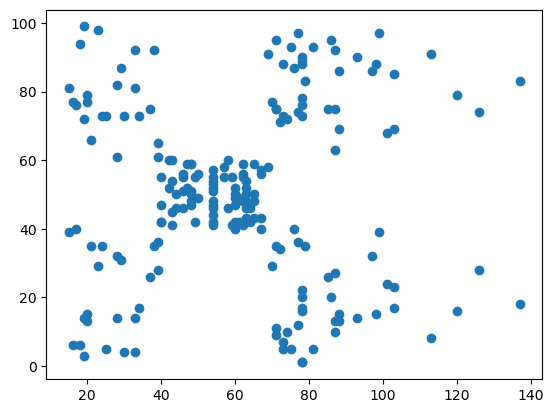

In [48]:
plt.scatter(df['Annual_Income_(K$)'], df['Spending_Score_(1-100)'])
plt.show()

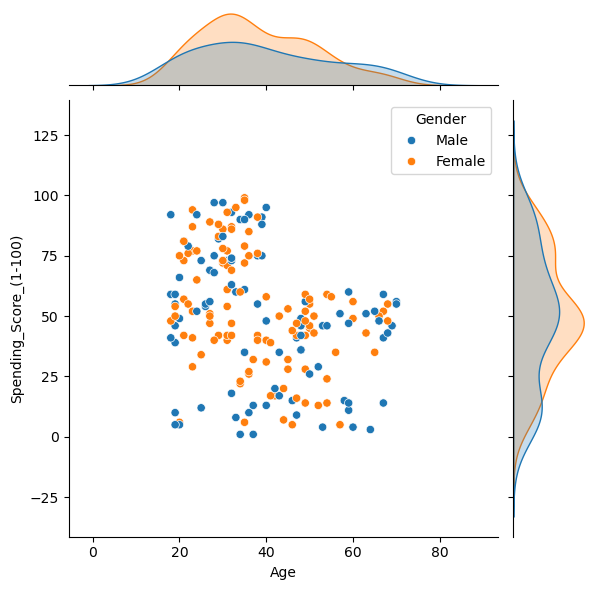

In [49]:
sns.jointplot(data=df, x='Age', y='Spending_Score_(1-100)', hue = 'Gender')
plt.show()

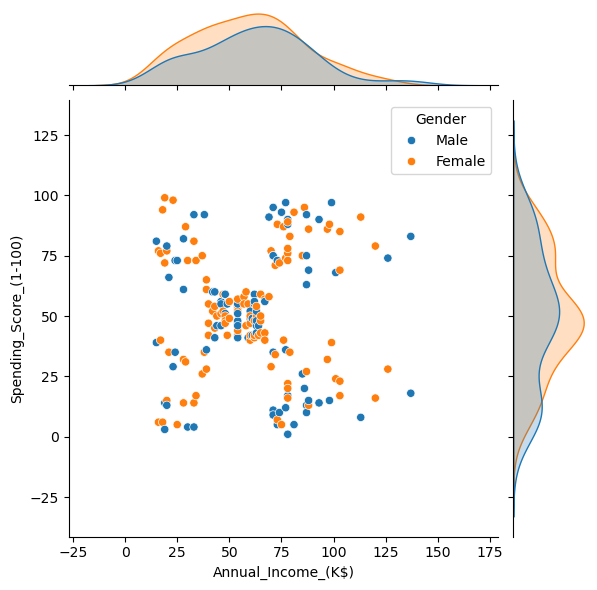

In [50]:
sns.jointplot(data= df, x= 'Annual_Income_(K$)', y= 'Spending_Score_(1-100)', hue = 'Gender');

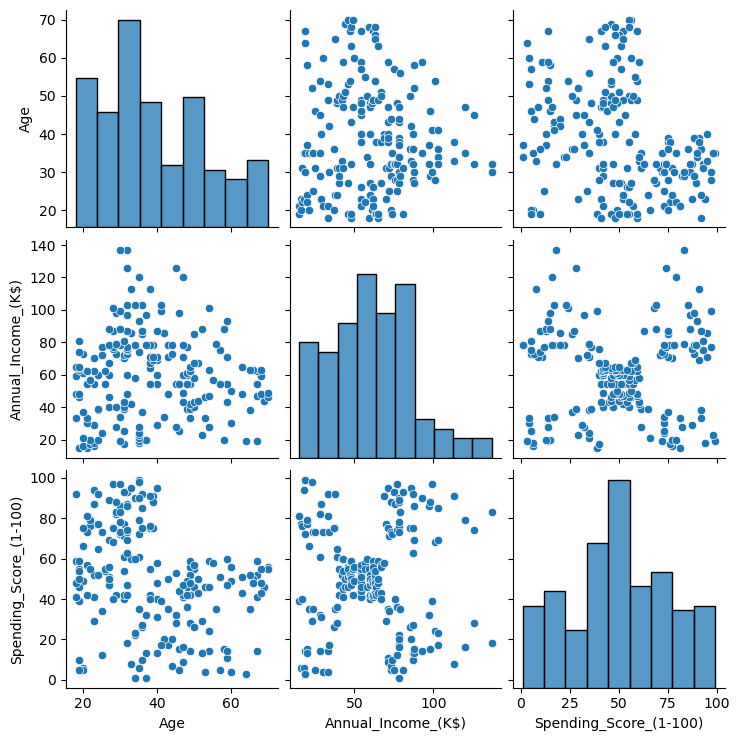

In [51]:
sns.pairplot(df[numeric_cols])
plt.show()

# Skeweness and Normalization

In [52]:
print(df['Age'].skew())
print(df['Annual_Income_(K$)'].skew())
print(df['Spending_Score_(1-100)'].skew())

0.48556885096681657
0.3218425498619055
-0.047220201374263374


Age and Annual Income are positively skewed and Spending Score is approximately symmetric

## Log Transformation

before transformation skew value is : 0.48556885096681657
after transformation skew value is : -0.08949060168904396


Text(0.5, 1.0, 'After Transformation')

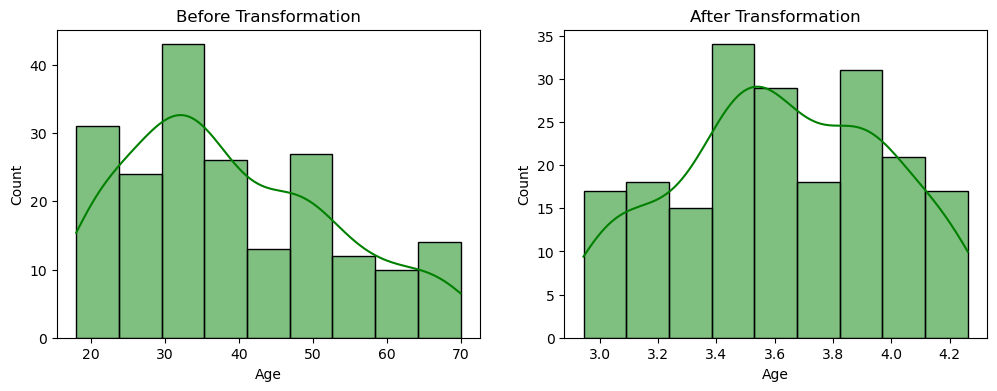

In [57]:
print('before transformation skew value is :', df['Age'].skew())
print('after transformation skew value is :',np.log1p(df['Age']).skew())

# plotting the distribution
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot((df['Age']), ax=ax1, color='green', kde=True)
sns.histplot(np.log1p(df['Age']), ax=ax2, color='green', kde=True)
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')


before transformation skew value is : 0.3218425498619055
after transformation skew value is : -0.7359971613306436


Text(0.5, 1.0, 'After Transformation')

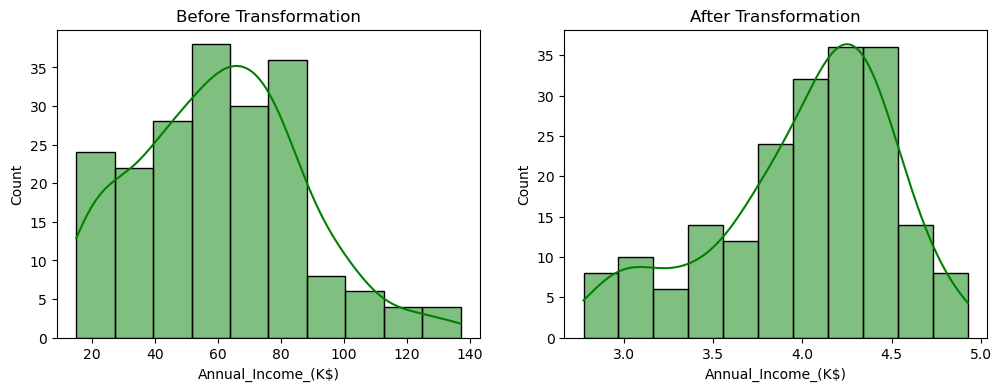

In [58]:
print('before transformation skew value is :', df['Annual_Income_(K$)'].skew())
print('after transformation skew value is :',np.log1p(df['Annual_Income_(K$)']).skew())

# plotting the distribution
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot((df['Annual_Income_(K$)']), ax=ax1, color='green', kde=True)
sns.histplot(np.log1p(df['Annual_Income_(K$)']), ax=ax2, color='green', kde=True)
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')


Log transformation works well on Age but not on the other two features 

## Square Root Transformation

before transformation skew value is : 0.48556885096681657
after transformation skew value is : 0.195059160132557


Text(0.5, 1.0, 'After Transformation')

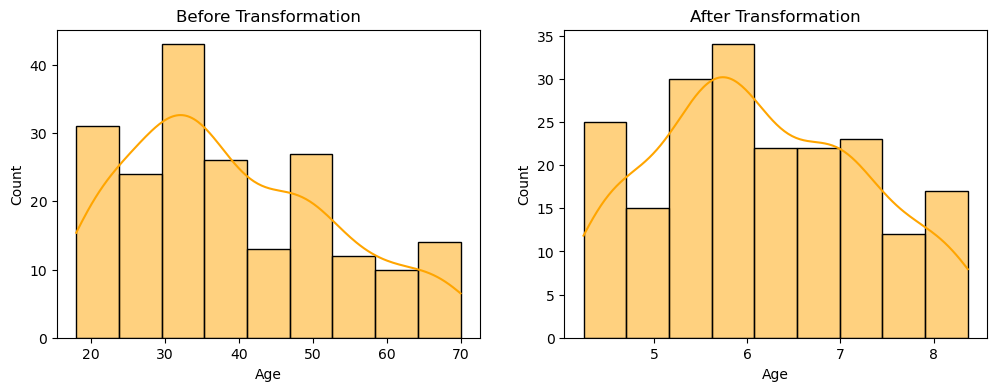

In [60]:
print('before transformation skew value is :', df['Age'].skew())
print('after transformation skew value is :',np.sqrt(df['Age']).skew())
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot((df['Age']), ax=ax1, kde=True, color='orange')
sns.histplot(np.sqrt(df['Age']), ax=ax2, kde=True, color='orange')
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')

before transformation skew value is : 0.3218425498619055
after transformation skew value is : -0.23028952579486217


Text(0.5, 1.0, 'After Transformation')

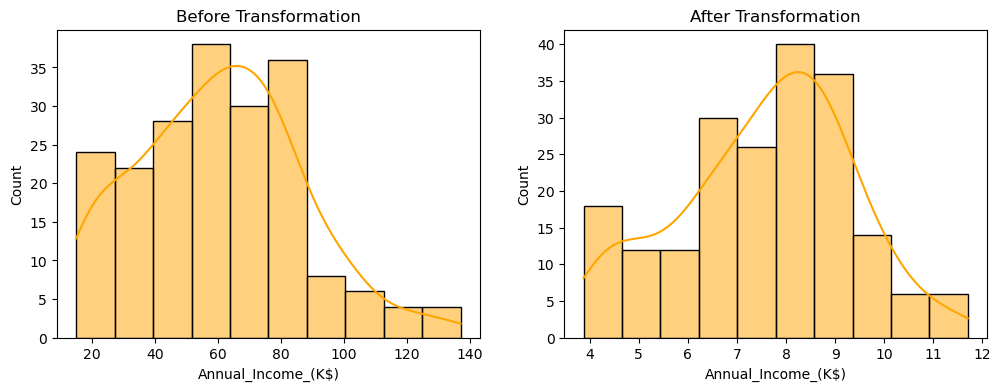

In [61]:
print('before transformation skew value is :', df['Annual_Income_(K$)'].skew())
print('after transformation skew value is :',np.sqrt(df['Annual_Income_(K$)']).skew())
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot((df['Annual_Income_(K$)']), ax=ax1, kde=True, color='orange')
sns.histplot(np.sqrt(df['Annual_Income_(K$)']), ax=ax2, kde=True, color='orange')
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')

## Box-Cox Transformation

In [63]:
from scipy.stats import skew 
from sklearn.preprocessing import power_transform

box = power_transform(df[['Age']], method = 'box-cox')

print('before transformation skew value is :', df['Age'].skew())
print('after transformation skew value is :', (skew(box)))

before transformation skew value is : 0.48556885096681657
after transformation skew value is : [-0.01632946]


Text(0.5, 1.0, 'After Transformation')

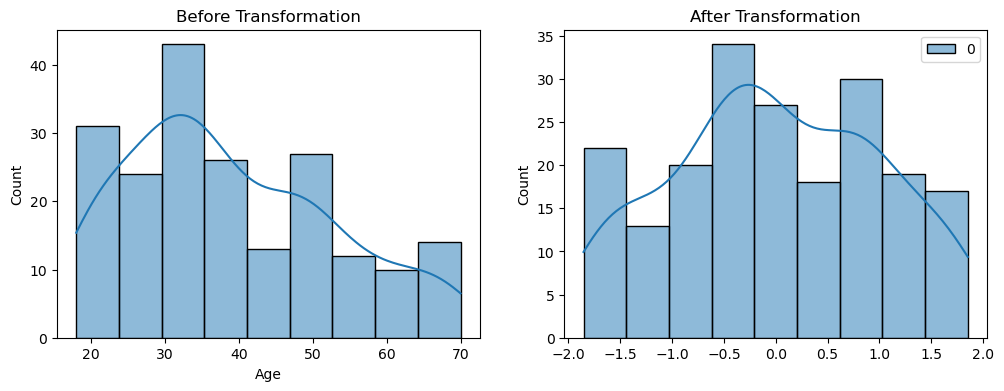

In [65]:
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot((df['Age']), ax=ax1, kde = True)
sns.histplot(box, ax=ax2, kde = True)
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')

In [66]:
box = power_transform(df[['Annual_Income_(K$)']], method = 'box-cox')

print('before transformation skew value is :', df['Annual_Income_(K$)'].skew())
print('after transformation skew value is :', (skew(box)))

before transformation skew value is : 0.3218425498619055
after transformation skew value is : [-0.0659024]


Text(0.5, 1.0, 'After Transformation')

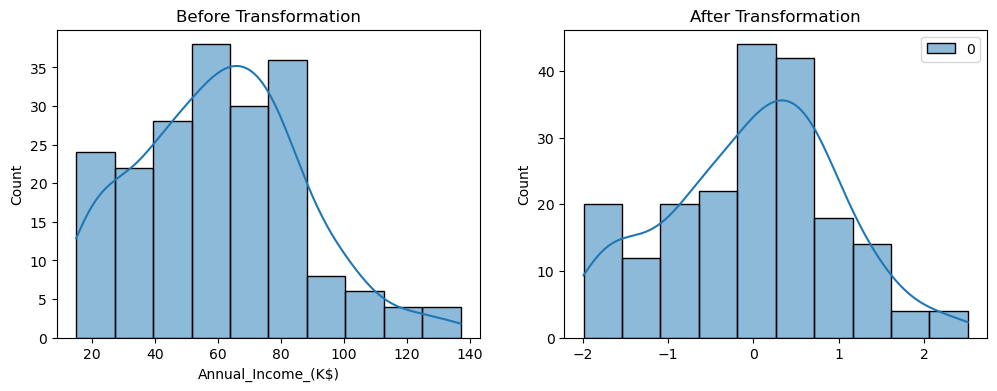

In [68]:
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot((df['Annual_Income_(K$)']), ax=ax1, kde = True)
sns.histplot(box, ax=ax2, kde = True)
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')

Box-Cox Transformation works much better than the previous two methods.

## Yeo_Johnson Transformation 

In [69]:
yeo = power_transform(df[['Age']])

print('before transformation skew value is :', df['Age'].skew())
print('after transformation skew value is :', (skew(yeo)))

before transformation skew value is : 0.48556885096681657
after transformation skew value is : [-0.01375134]


Text(0.5, 1.0, 'After Transformation')

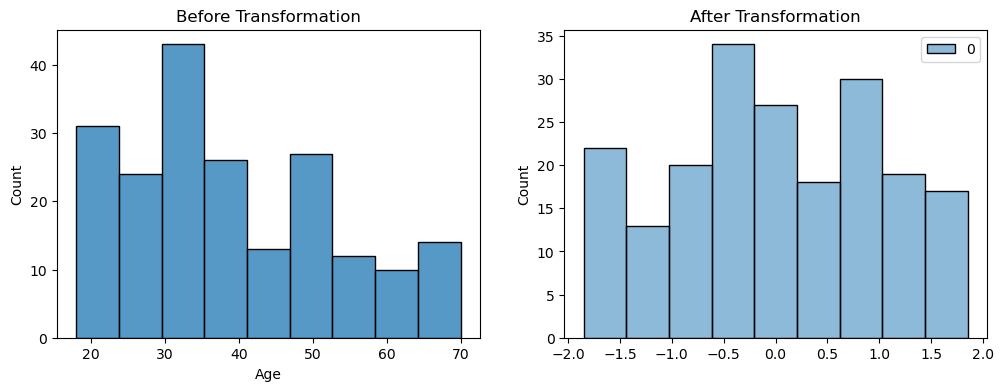

In [70]:
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot((df['Age']), ax=ax1)
sns.histplot(yeo, ax=ax2)
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')


In [71]:
yeo = power_transform(df[['Annual_Income_(K$)']])

print('before transformation skew value is :', df['Annual_Income_(K$)'].skew())
print('after transformation skew value is :', (skew(yeo)))

before transformation skew value is : 0.3218425498619055
after transformation skew value is : [-0.0633006]


Text(0.5, 1.0, 'After Transformation')

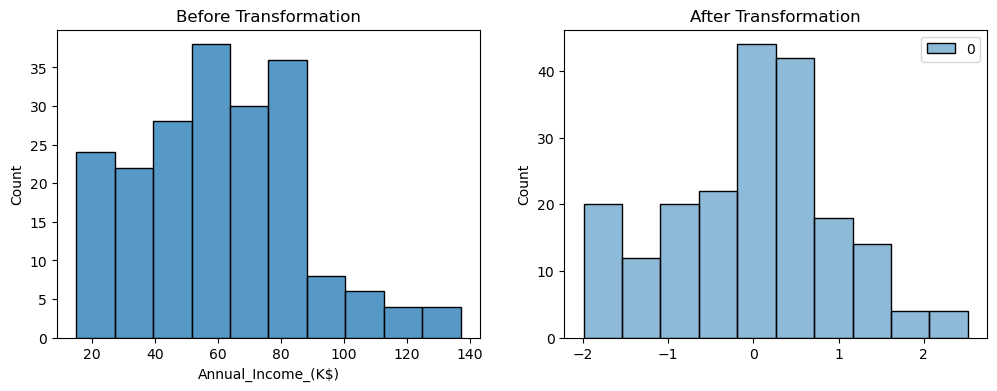

In [72]:
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot((df['Annual_Income_(K$)']), ax=ax1)
sns.histplot(yeo, ax=ax2)
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')

Better than box-cox transformation. 

In [75]:
df_copy = df.copy()

In [76]:
df_copy['Age'] = power_transform(df[['Age']])

In [77]:
df_copy['Annual_Income_(K$)'] = power_transform(df[['Annual_Income_(K$)']])

In [79]:
df_copy['Spending_Score_(1-100)'] = power_transform(df[['Spending_Score_(1-100)']])

In [80]:
df_copy.describe()

,Customerid,Age,Annual_Income_(K$),Spending_Score_(1-100)
count,200.000000,2.000000e+02,2.000000e+02,2.000000e+02
mean,100.500000,7.016610e-16,-4.263256e-16,-2.331468e-16
std,57.879185,1.002509e+00,1.002509e+00,1.002509e+00
min,1.000000,-1.851739e+00,-1.989930e+00,-2.100163e+00
25%,50.750000,-6.614938e-01,-6.784270e-01,-5.537231e-01
50%,100.500000,-5.699633e-02,1.144755e-01,3.831767e-02
75%,150.250000,8.055045e-01,7.018660e-01,8.814911e-01
max,200.000000,1.852811e+00,2.515898e+00,1.786065e+00


In [91]:
df_copy.to_csv('transformed_data.csv')

In [81]:
df.describe()

,Customerid,Age,Annual_Income_(K$),Spending_Score_(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [93]:
df_copy[numeric_cols].skew()

Age                      -0.013855
Annual_Income_(K$)       -0.063780
Spending_Score_(1-100)   -0.223377
dtype: float64

# Clustering with K-Means

In [94]:
X = pd.DataFrame(df_copy[['Annual_Income_(K$)', 'Spending_Score_(1-100)']])

In [95]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Annual_Income_(K$)      200 non-null    float64
 1   Spending_Score_(1-100)  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


## Elbow Method

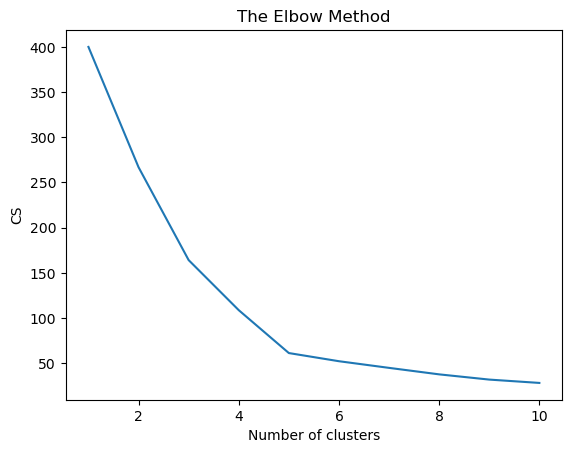

In [96]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

3 and 5 are optimal values of K as seen from the graph 

## Using K-Means with k = 3

In [109]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [110]:
kmeans.cluster_centers_

array([[ 0.98805251, -1.24840835],
       [ 0.9580272 ,  1.1795651 ],
       [-0.62186134,  0.00210584]])

In [111]:
kmeans.inertia_

164.13175145574826

/home/soumya/miniconda3/envs/mlpclub/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


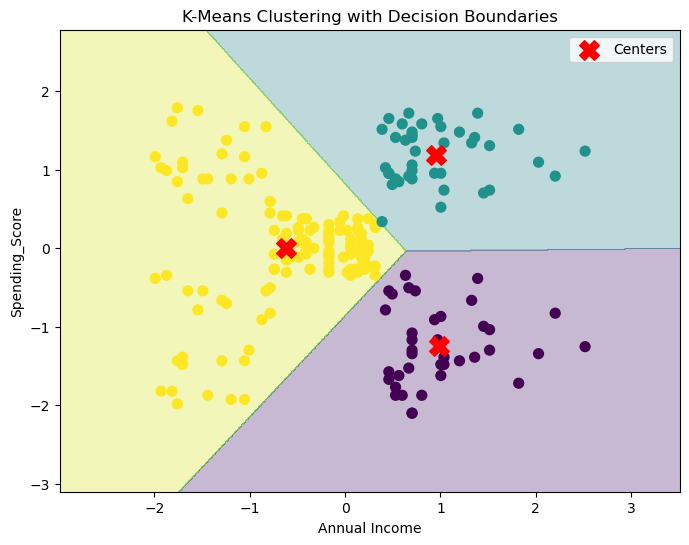

In [112]:
X_np = X.values
x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Step 2: Predict cluster labels for each point in the mesh grid
grid = np.c_[xx.ravel(), yy.ravel()]
Z = kmeans.predict(grid)
Z = Z.reshape(xx.shape)

# Step 3: Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Step 4: Plot original data and cluster centers
plt.scatter(X_np[:, 0], X_np[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centers')
plt.xlabel('Annual Income')
plt.ylabel('Spending_Score')
plt.title("K-Means Clustering with Decision Boundaries")
plt.legend()
plt.show()

1. The yellow region represents low income spenders
2. The green region represents high income high spenders
3. The purple region represents high income low spenders

## Using K-Means with k = 5

In [114]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [105]:
kmeans.cluster_centers_

array([[-0.13811141,  0.01122514],
       [ 0.97265491,  1.20116211],
       [-1.42201891, -1.18517542],
       [ 1.02744075, -1.31331303],
       [-1.42201891,  1.10336507]])

In [106]:
kmeans.inertia_

61.28629189681526

/home/soumya/miniconda3/envs/mlpclub/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


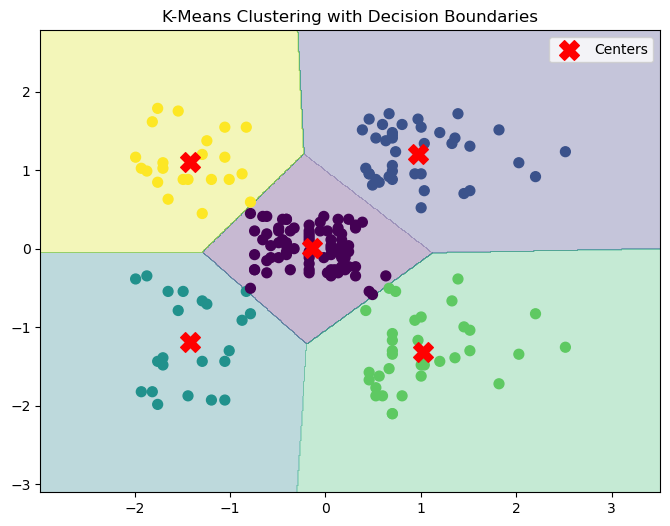

In [115]:
X_np = X.values
x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Step 2: Predict cluster labels for each point in the mesh grid
grid = np.c_[xx.ravel(), yy.ravel()]
Z = kmeans.predict(grid)
Z = Z.reshape(xx.shape)

# Step 3: Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Step 4: Plot original data and cluster centers
plt.scatter(X_np[:, 0], X_np[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centers')


plt.title("K-Means Clustering with Decision Boundaries")
plt.legend()
plt.show()

1. The points in yellow are low income high spenders (LIHS)
2. The points in blue are high income high spenders (HIHS)
3. The points in purple are medium income medium spenders (MIMS)
4. The points in dark green are low income low spenders (LILS)
5. The points in light green are high income low spenders (HILS)


In [126]:
labels = kmeans.labels_
labels

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [129]:
custom_labels = ['MIMS', 'HIHS', 'LILS', 'HILS', 'LIHS']

/tmp/ipykernel_461725/2109488646.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_np[labels == i, 0], X_np[labels == i, 1],


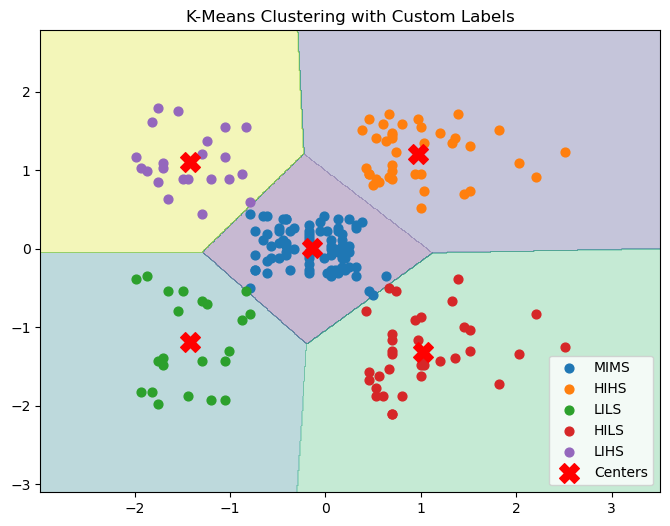

In [130]:
# Plot cluster regions
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot each cluster with its own label in the legend
for i in range(len(custom_labels)):
    plt.scatter(X_np[labels == i, 0], X_np[labels == i, 1], 
                label=custom_labels[i], s=40, cmap='viridis')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centers')

plt.legend()
plt.title("K-Means Clustering with Custom Labels")
plt.show()


In [123]:
label_series = pd.Series(labels)
label_counts = label_series.value_counts().sort_index()


In [124]:
print(label_counts)

0    82
1    39
2    22
3    35
4    22
Name: count, dtype: int64


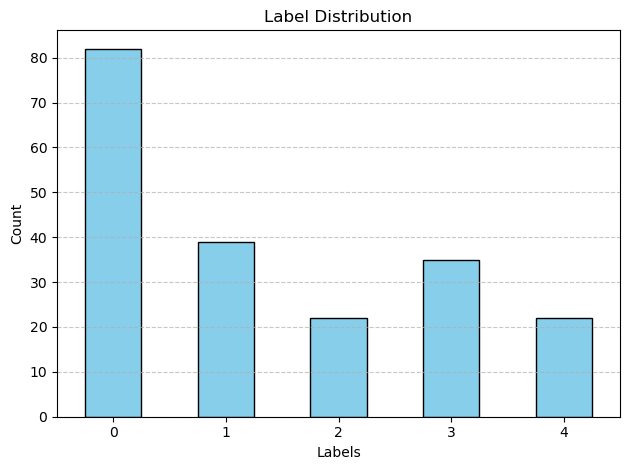

In [131]:
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()